In [1]:
import os
import re
import math
import json
import pickle
import random
from dotenv import load_dotenv
import numpy as np
from sentence_transformers import SentenceTransformer
from datasets import load_dataset, Dataset, DatasetDict
import chromadb
from sklearn.manifold import TSNE
import plotly.graph_objects as go

In [7]:
MAXIMUM_DATAPOINTS = 20_000
DB = "products_vectorstore"
client = chromadb.PersistentClient(path=DB)

In [8]:
collection = client.get_collection("products")

In [9]:
CATEGORIES = ['Appliances', 'Automotive', 'Cell_Phones_and_Accessories', 'Electronics','Musical_Instruments', 'Office_Products', 'Tools_and_Home_Improvement', 'Toys_and_Games']
COLORS = ['red', 'blue', 'brown', 'orange', 'yellow', 'green' , 'purple', 'cyan']

In [10]:
result = collection.get(include=['embeddings','documents','metadatas'],limit=MAXIMUM_DATAPOINTS)
vectors = np.array(result['embeddings'])
documents = result['documents']
categories = [metadata['category'] for metadata in result["metadatas"]]
colors = [COLORS[CATEGORIES.index(c)] for c in categories]

In [11]:
tsne = TSNE(n_components=2, random_state=42,n_jobs=1)
reduced_vectors = tsne.fit_transform(vectors)

D:\AN\envs\llms\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\AN\envs\llms\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AN\envs\llms\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\AN\envs\llms\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\AN\envs\llms\Lib\subprocess.py", line 1026,

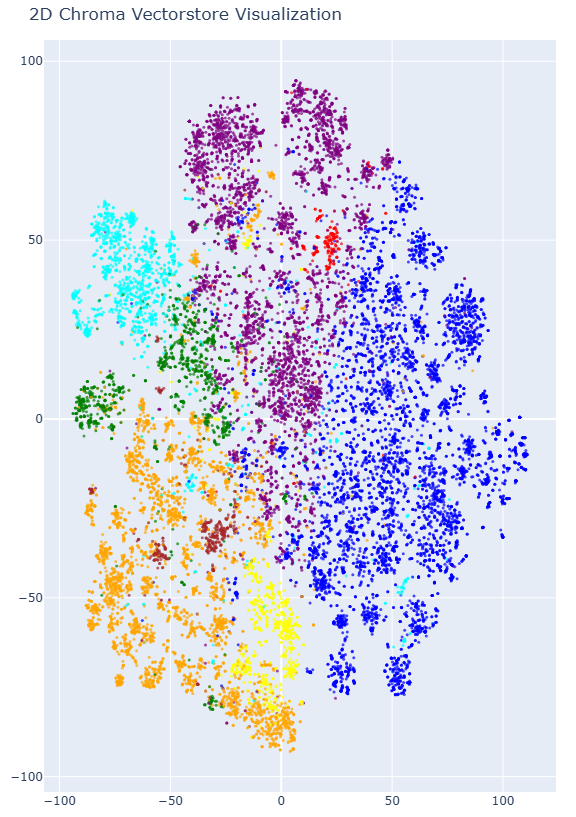

In [12]:

# Create the 2D scatter plot
fig = go.Figure(data=[go.Scatter(
    x=reduced_vectors[:, 0],
    y=reduced_vectors[:, 1],
    mode='markers',
    marker=dict(size=3, color=colors, opacity=0.7),
)])

fig.update_layout(
    title='2D Chroma Vectorstore Visualization',
    scene=dict(xaxis_title='x', yaxis_title='y'),
    width=1200,
    height=800,
    margin=dict(r=20, b=10, l=10, t=40)
)

fig.show()